## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

## Plotting function

In [2]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

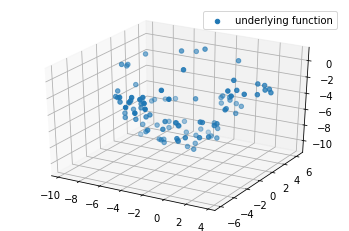

In [3]:
bias_true = torch.FloatTensor([1,-1])
x = rand_tensor = torch.rand((100, 3))
weights_1 = torch.FloatTensor([[1, 1,0],[1,0,1]]).T
weights_2 = torch.FloatTensor([[0,0,1],[0,1,0]]).T

y_true = torch.matmul(torch.square(x) , weights_1) +  torch.matmul(x , weights_2) + bias_true
X_embedded = TSNE(n_components=2).fit_transform(x.detach())
y_embedded = TSNE(n_components=1).fit_transform(y_true.detach())
plot_3d(X_embedded, y_embedded)

## Defining model

In [4]:
import torch
import torch.nn as nn

d=3
class TorchModel(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, 6)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(6, 4)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(4, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    
    return l3
    
loss = nn.MSELoss()
model = TorchModel(d)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(1.8741, grad_fn=<MseLossBackward0>)


## Training function

In [5]:
# one epoch
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad() #zeroing the gradient
y_pred_tensor = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss_value.backward() #computing gradient
optimizer.step() #moving gradient from start to end

y_pred_tensor = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(1.8741, grad_fn=<MseLossBackward0>)
tensor(1.8741, grad_fn=<MseLossBackward0>)


tensor(1.4145, grad_fn=<MseLossBackward0>)
tensor(1.3450, grad_fn=<MseLossBackward0>)
tensor(1.2794, grad_fn=<MseLossBackward0>)
tensor(1.2174, grad_fn=<MseLossBackward0>)
tensor(1.1587, grad_fn=<MseLossBackward0>)
tensor(1.1031, grad_fn=<MseLossBackward0>)
tensor(1.0504, grad_fn=<MseLossBackward0>)
tensor(1.0005, grad_fn=<MseLossBackward0>)
tensor(0.9533, grad_fn=<MseLossBackward0>)
tensor(0.9085, grad_fn=<MseLossBackward0>)
tensor(0.8661, grad_fn=<MseLossBackward0>)
tensor(0.8259, grad_fn=<MseLossBackward0>)
tensor(0.7879, grad_fn=<MseLossBackward0>)
tensor(0.7519, grad_fn=<MseLossBackward0>)
tensor(0.7179, grad_fn=<MseLossBackward0>)
tensor(0.6858, grad_fn=<MseLossBackward0>)
tensor(0.6554, grad_fn=<MseLossBackward0>)
tensor(0.6268, grad_fn=<MseLossBackward0>)
tensor(0.5998, grad_fn=<MseLossBackward0>)
tensor(0.5743, grad_fn=<MseLossBackward0>)
tensor(0.5504, grad_fn=<MseLossBackward0>)
tensor(0.5279, grad_fn=<MseLossBackward0>)
tensor(0.5068, grad_fn=<MseLossBackward0>)
tensor(0.48

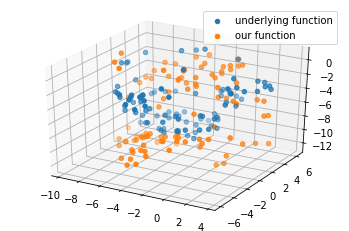

In [6]:
# looping on no of epochs
lr=0.02
num_epochs=70
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
for epoch in range(num_epochs):
  optimizer.zero_grad()
  y_pred = model(x)
  loss_value = loss(y_pred, y_true)
  print(loss_value)
  loss_value.backward()
  optimizer.step()

y_pred= model(x).detach()
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
plot_3d(X_embedded, y_embedded,y_pred_embedded)